In [40]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from collections import defaultdict

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(repo_root)

from src.utils.operation_helpers import  BASE_FUNCTIONS
from src.utils.c_operation_helpers import run_simulation

In [41]:
# rsync -zaP burrow:multi-reactive_rankings/higher_order_ranking/exp/ex02/data ~/senior_thesis/higher_order_ranking/exp/ex02/

In [42]:
EPOCHS = 250

### Synthetic Data

In [43]:
data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')

filein_idx = os.path.join(data_dir, 'N-1000_M-1000_K-4_L-0_nodes.txt')
filein_data = os.path.join(data_dir, 'N-1000_M-1000_K-4_L-0_edges.txt')

results = defaultdict(list)

train_sizes = np.logspace(-1, 0, endpoint=False, num=15)
results = {model: [] for model in BASE_FUNCTIONS}  

for train_size in train_sizes:
    print(train_size)
    epoch_log_likelihoods = {model: [] for model in BASE_FUNCTIONS} 
    for epoch in range(EPOCHS):
        df = run_simulation(filein_data, filein_data, train_size)
        for model in df['model'].unique():
            epoch_log_likelihoods[model].append(float(df[df['model'] == model]['log-likelihood'].values[0]))
    # Average the results across epochs and store in the main results dictionar
    for model in epoch_log_likelihoods:
        results[model].append(np.mean(epoch_log_likelihoods[model]))

0.09999999999999999
0.11659144011798317
0.13593563908785253
0.15848931924611132
0.18478497974222907
0.21544346900318834
0.251188643150958
0.2928644564625236
0.34145488738336016
0.3981071705534972
0.46415888336127786
0.5411695265464636
0.6309573444801932
0.7356422544596414
0.8576958985908941


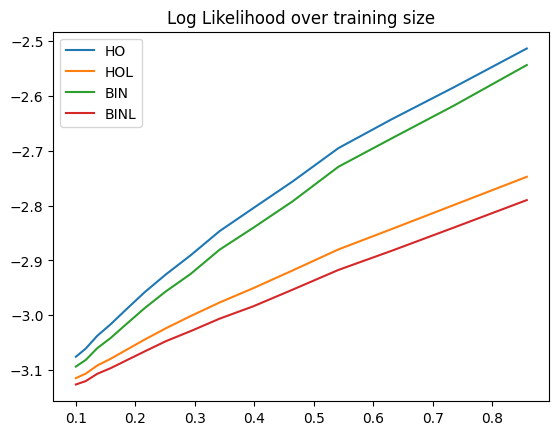

In [44]:
plt.title('Log Likelihood over training size')
plt.plot(train_sizes, results['HO_BT'], label='HO')
plt.plot(train_sizes, results['HOL_BT'], label='HOL')
plt.plot(train_sizes,results['BIN'], label='BIN' )
plt.plot(train_sizes,results['BINL'], label='BINL' )
plt.legend()


### Real Data

In [45]:
data_dir = os.path.join(repo_root, 'datasets', 'Real_Data')

filein_idx = os.path.join(data_dir, '00103_nodes.txt')
filein_data = os.path.join(data_dir, '00103_edges.txt')

results = defaultdict(list)

train_sizes = np.logspace(-1, 0, endpoint=False, num=15)
results = {model: [] for model in BASE_FUNCTIONS}  

for train_size in train_sizes:
    print(train_size)
    epoch_log_likelihoods = {model: [] for model in BASE_FUNCTIONS} 
    for epoch in range(EPOCHS):
        df = run_simulation(filein_idx, filein_data, train_size)
        for model in df['model'].unique():
            epoch_log_likelihoods[model].append(float(df[df['model'] == model]['log-likelihood'].values[0]))
    # Average the results across epochs and store in the main results dictionar
    for model in epoch_log_likelihoods:
        results[model].append(np.mean(epoch_log_likelihoods[model]))

0.09999999999999999
0.11659144011798317
0.13593563908785253
0.15848931924611132
0.18478497974222907
0.21544346900318834
0.251188643150958
0.2928644564625236
0.34145488738336016
0.3981071705534972
0.46415888336127786
0.5411695265464636
0.6309573444801932
0.7356422544596414
0.8576958985908941


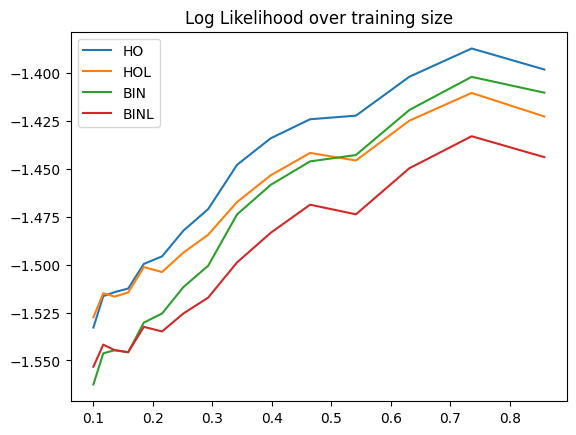

In [46]:
plt.title('Log Likelihood over training size')
plt.plot(train_sizes, results['HO_BT'], label='HO')
plt.plot(train_sizes, results['HOL_BT'], label='HOL')
plt.plot(train_sizes,results['BIN'], label='BIN' )
plt.plot(train_sizes,results['BINL'], label='BINL' )

plt.legend()